In [1]:
import os
import numpy as np
import pandas as pd

from scipy import stats
from scipy.ndimage import gaussian_filter
import statsmodels.api as sm

import pingouin as pg

import matplotlib as mpl
import matplotlib.pyplot as plt  
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
import seaborn as sns

from datetime import date
import random

In [2]:
# no top and right spines in all plots
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
mother_path = 'D:/Multi-modal project/analysis/'
save_path = mother_path+'result/5. Single condition selectivity/'
fig_path = mother_path+'result/figures/'

### Parameter setting

In [4]:
sig_alpha = 0.01
sig_cohend = 0.4
cons_bin_crit = 5

gauss_sigma = 2
gauss_on = True

only_PER = True   # analyze only PER neurons?

condition = ['Multimodal','Visual','Auditory','Control']
cat = ['M','V','A','MV','MA','VA','MVA','None']

# colors for multimodal, vis-only, aud-only conditions
#colorpalette = ['mediumorchid','cornflowerblue','lightcoral','gray']
colorpalette = ['purple','blue','red','gray']

today = str(date.today())

### Data preparation

In [81]:
cell_path = mother_path+'result/zFR export/13-Apr-2022 (5 trials)/'

data_path = mother_path+'result/3. Item-selectivity/2023-01-09/'
df = pd.read_csv(data_path+'2023-01-09_item-selectivity.csv')

# analyze only PER neurons
if only_PER == True:
    df = df[df['Region']=='PER']
    df.reset_index(inplace=True,drop=True)
df.insert(4,'Cat','')

for i in range(len(df)):
    cat_info = ''
    if df.loc[i,'M_sig'] == 1:
        cat_info += 'M'
    if df.loc[i,'V_sig'] == 1:
        cat_info += 'V'
    if df.loc[i,'A_sig'] == 1:
        cat_info += 'A'
    if cat_info=='':
        df.loc[i,'Cat'] = 'None'
    else:
        df.loc[i,'Cat'] = cat_info
df = df[(df['Cat']=='M')|(df['Cat']=='V')|(df['Cat']=='A')].reset_index(drop=True)

In [82]:
# load selectivity data
Binary_M = pd.read_csv(data_path+'Binary_M.csv')
Binary_V = pd.read_csv(data_path+'Binary_V.csv')
Binary_A = pd.read_csv(data_path+'Binary_A.csv')
Binary_C = pd.read_csv(data_path+'Binary_C.csv')

Cohend_M = pd.read_csv(data_path+'Cohend_M.csv')
Cohend_V = pd.read_csv(data_path+'Cohend_V.csv')
Cohend_A = pd.read_csv(data_path+'Cohend_A.csv')
Cohend_C = pd.read_csv(data_path+'Cohend_C.csv')

In [83]:
# empty list for result csv file
result=[]

### Comparing cell proportions between M, V, A cells

# of M cells = 66 (26.51%)
# of V cells = 37 (14.86%)
# of A cells = 30 (12.05%)


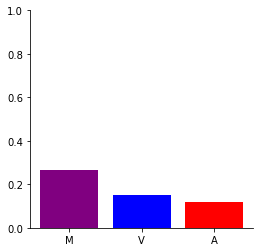

In [84]:
n = 249    # number of object-selective neurons

num_M = sum(df['Cat']=='M')
num_V = sum(df['Cat']=='V')
num_A = sum(df['Cat']=='A')
print(f'# of M cells = {num_M} ({num_M/249*100:.2f}%)')
print(f'# of V cells = {num_V} ({num_V/249*100:.2f}%)')
print(f'# of A cells = {num_A} ({num_A/249*100:.2f}%)')

fig,ax = plt.subplots(figsize=(4,4))
y = np.array([sum(df['Cat']=='M'),sum(df['Cat']=='V'),sum(df['Cat']=='A')])/n
ax.bar(x=['M','V','A'],height=y,color=colorpalette[0:3])

ax.set_ylim([0,1])
ax.set_yticks(np.arange(0,1.2,0.2));

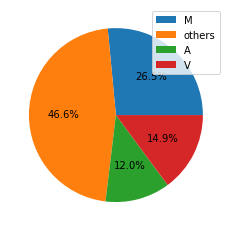

In [120]:
fig,ax = plt.subplots(figsize=(4,4))
ax.pie([num_M,(249-num_M-num_V-num_A),num_A,num_V],autopct='%.1f%%');
ax.legend(['M','others','A','V'])
plt.savefig(fig_path+'single_proportion.svg')

In [121]:
(249-num_M-num_V-num_A)

116

### Comparing selectivity between M, V, A cells

In [100]:
df['SI'] = 0

df.loc[df['Cat']=='M','SI'] = df.loc[df['Cat']=='M','M_L_field_size']+df.loc[df['Cat']=='M','M_R_field_size']
df.loc[df['Cat']=='V','SI'] = df.loc[df['Cat']=='V','V_L_field_size']+df.loc[df['Cat']=='V','V_R_field_size']
df.loc[df['Cat']=='A','SI'] = df.loc[df['Cat']=='A','A_L_field_size']+df.loc[df['Cat']=='A','A_R_field_size']

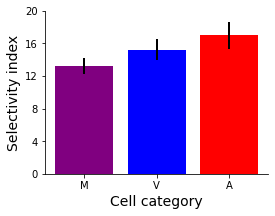

In [101]:
fig,ax = plt.subplots(figsize=(4,3))

x = ['M','V','A']
y = df.groupby('Cat').mean()['SI'].reindex(['M','V','A'])
yerr =df.groupby('Cat').sem()['SI'].reindex(['M','V','A'])

ax.bar(x=x,height=y,color=colorpalette[0:3])
ax.errorbar(x=x,y=y,yerr=yerr,fmt='none',color='black',linewidth=2)
ax.set_ylabel('Selectivity index',fontsize=14)
ax.set_yticks(range(0,22,4))
ax.set_ylim([0,20])
ax.set_xlabel('Cell category',fontsize=14);

#plt.savefig(fig_path+'single_SI.svg')
#plt.savefig(fig_path+'single_SI.png',dpi=200,facecolor='white')

In [102]:
pg.anova(data=df, dv='SI',between='Cat',detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Cat,299.683814,2,149.841907,2.260514,0.108382,0.033608
1,Within,8617.263554,130,66.286643,NaN,NaN,NaN


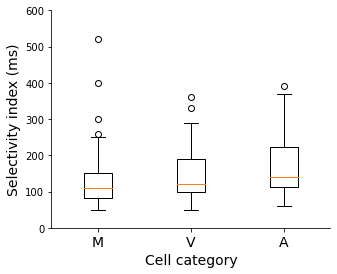

In [103]:
fig,ax = plt.subplots(figsize=(5,4))

ax.boxplot([df.loc[df['Cat']=='M','SI'],
            df.loc[df['Cat']=='V','SI'],
            df.loc[df['Cat']=='A','SI']]);
ax.set_ylim([0,60])
ax.set_yticks(range(0,70,10));
ax.set_yticklabels(range(0,700,100));
ax.set_ylabel('Selectivity index (ms)',fontsize=14);
ax.set_xticklabels(['M','V','A'],fontsize=14);
ax.set_xlabel('Cell category',fontsize=14);

In [106]:
pg.kruskal(data=df, dv='SI',between='Cat')

,Source,ddof1,H,p-unc
Kruskal,Cat,2,6.698264,0.035115


### Temporal patterns of object-selectivity

In [91]:
M = np.empty((0,95))
V = np.empty((0,95))
A = np.empty((0,95))

for cell_run in df.Key:
    c = df.loc[df['Key']==cell_run,'Cat'].values[0]
    if c=='M':
        binary = np.abs(Binary_M[Binary_M.iloc[:,0]==cell_run].iloc[:,1:96].values[0])
        M = np.append(M,[binary],axis=0)
    elif c=='V':
        binary = np.abs(Binary_V[Binary_V.iloc[:,0]==cell_run].iloc[:,1:96].values[0])
        V = np.append(V,[binary],axis=0)
    elif c=='A':
        binary = np.abs(Binary_A[Binary_A.iloc[:,0]==cell_run].iloc[:,1:96].values[0])
        A = np.append(A,[binary],axis=0)

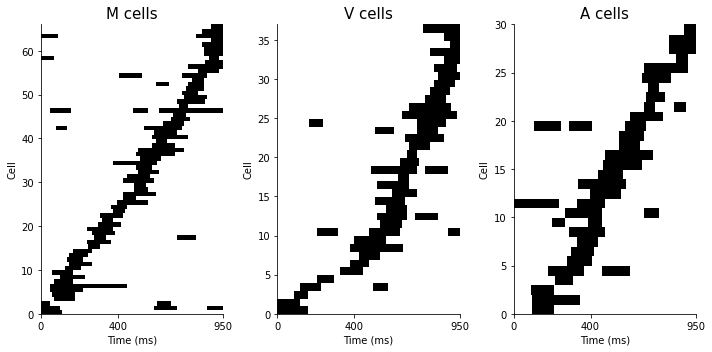

In [92]:
df['peaktime'] = 0

df.loc[df['Cat']=='M','peaktime'] = df.loc[df['Cat']=='M','M_peaktime']
df.loc[df['Cat']=='V','peaktime'] = df.loc[df['Cat']=='V','V_peaktime']
df.loc[df['Cat']=='A','peaktime'] = df.loc[df['Cat']=='A','A_peaktime']

fig,ax = plt.subplots(1,3,figsize=(10,5))
binary = [M,V,A]

for i in range(3):
    a = df[df['Cat']==cat[i]].reset_index()
    sort_index = sorted(range(len(a['peaktime'])),key=lambda k:a.loc[k,'peaktime'])
    smap = [binary[i][j,:] for j in sort_index]
    ax[i].pcolor(smap,cmap='binary')
    ax[i].set_title(cat[i]+' cells',fontsize=15)
    ax[i].set_xticks([0,40,95])
    ax[i].set_xticklabels([0,400,950]);
    ax[i].set_xlabel('Time (ms)')    
    ax[i].set_ylabel('Cell')
    
fig.tight_layout()
#plt.savefig(fig_path+'single_population_map.svg')
#plt.savefig(fig_path+'single_population_map.png',dpi=200,facecolor='white')

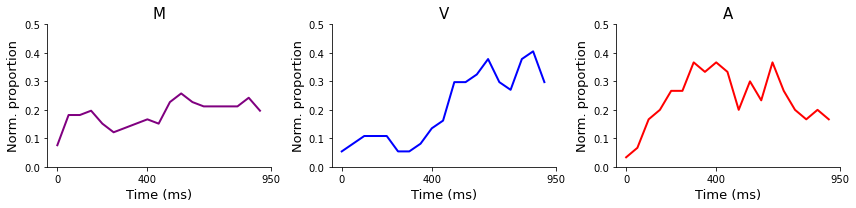

In [203]:
# smoothing
bin_size = 5
num_bin = int(95/bin_size)

result_smooth = np.zeros((3,num_bin))

for i in range(num_bin):    
    result_smooth[0,i] = np.sum(np.any(M[:,i*bin_size:(i+1)*bin_size]==1,axis=1))
    result_smooth[1,i] = np.sum(np.any(V[:,i*bin_size:(i+1)*bin_size]==1,axis=1))
    result_smooth[2,i] = np.sum(np.any(A[:,i*bin_size:(i+1)*bin_size]==1,axis=1))

result_smooth[0,:] = result_smooth[0,:]/np.shape(M)[0]
result_smooth[1,:] = result_smooth[1,:]/np.shape(V)[0]
result_smooth[2,:] = result_smooth[2,:]/np.shape(A)[0]

fig,ax = plt.subplots(1,3,figsize=(12,3))

t = ['M','V','A']
for i in range(3):
    ax[i].plot(result_smooth[i,:],color=colorpalette[i],linewidth=2)
    ax[i].set_ylim([0,0.5])
    ax[i].set_yticks(np.arange(0,0.6,0.1))
    ax[i].set_xticks([0,40/bin_size,95/bin_size])
    ax[i].set_xticklabels([0,400,950]);
    ax[i].set_title(t[i],fontsize=15)
    ax[i].set_ylabel('Norm. proportion',fontsize=13)
    ax[i].set_xlabel('Time (ms)',fontsize=13)
plt.tight_layout()

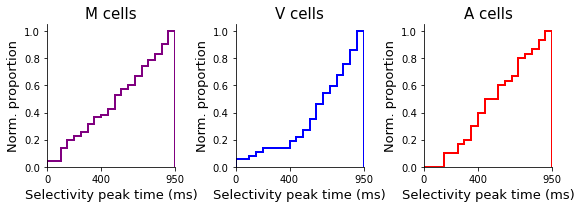

In [36]:
fig,ax = plt.subplots(1,3,figsize=(8,3))
t = ['M cells','V cells','A cells']

hist_result = [df.loc[df['Cat']=='M','peaktime'],
               df.loc[df['Cat']=='V','peaktime'],
               df.loc[df['Cat']=='A','peaktime']]

for i in range(3):
    ax[i].hist(hist_result[i],color=colorpalette[i],bins=range(0,1000,50),
               cumulative=True,density=True,histtype='step',linewidth=2)
    ax[i].set_xlim([0,950])
    ax[i].set_title(t[i],fontsize=15)
    ax[i].set_ylabel('Norm. proportion',fontsize=13)
    ax[i].set_xlabel('Selectivity peak time (ms)',fontsize=13)
    ax[i].set_xticks([0,400,950])
    
plt.tight_layout()
plt.savefig(fig_path+'single_peak_cumul.svg')
plt.savefig(fig_path+'single_peak_cumul.png',dpi=200,facecolor='white')

In [186]:
for i in range(3):
    s,p = stats.kstest(hist_result[i], stats.uniform(loc=0, scale=950).cdf)
    print(f"{t[i]} K-S test with uniform distribution")
    print(f"KS statistic: {s}")
    print(f"P-value: {p}")
    print('=============================================')

M cells K-S test with uniform distribution
KS statistic: 0.10669856459330146
P-value: 0.411393869522251
V cells K-S test with uniform distribution
KS statistic: 0.32062588904694167
P-value: 0.0006963199377983953
A cells K-S test with uniform distribution
KS statistic: 0.18070175438596495
P-value: 0.24942033060940794


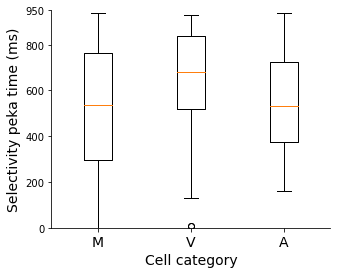

In [51]:
fig,ax = plt.subplots(figsize=(5,4))
ax.boxplot([df.loc[df['Cat']=='M','peaktime'],
            df.loc[df['Cat']=='V','peaktime'],
            df.loc[df['Cat']=='A','peaktime']]);
ax.set_ylim([0,950])
ax.set_yticks([0,200,400,600,800,950]);
ax.set_ylabel('Selectivity peka time (ms)',fontsize=14);
ax.set_xticklabels(['M','V','A'],fontsize=14);
ax.set_xlabel('Cell category',fontsize=14);

In [65]:
pg.kruskal(data=df, dv='peaktime',between='Cat',detailed=True)

,Source,ddof1,H,p-unc
Kruskal,Cat,2,4.953778,0.084004
